<a href="https://colab.research.google.com/github/Tasnia16EEE/MTA-Ridership-Trends-and-Recovery-Analysis/blob/main/mta_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MTA Ridership Trends and Recovery Analysis - Support Future Modeling of Congestion Pricing Impacts

## Setup

In [ ]:
!pip install pandas matplotlib seaborn
!pip install plotly

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests


## Loading Data Using API Endpoints

In [ ]:

# API endpoint and parameters
url = "https://data.ny.gov/resource/vxuj-8kew.json"
params = {"$limit": 5000, "$order": "date ASC"}

# Request data from the API
response = requests.get(url, params=params)
data = response.json()

# Convert JSON to DataFrame
df = pd.DataFrame(data)


## Exploring The Dataset

In [ ]:
df.head()

,date,subways_total_estimated_ridership,subways_of_comparable_pre_pandemic_day,buses_total_estimated_ridersip,buses_of_comparable_pre_pandemic_day,lirr_total_estimated_ridership,lirr_of_comparable_pre_pandemic_day,metro_north_total_estimated_ridership,metro_north_of_comparable_pre_pandemic_day,access_a_ride_total_scheduled_trips,access_a_ride_of_comparable_pre_pandemic_day,bridges_and_tunnels_total_traffic,bridges_and_tunnels_of_comparable_pre_pandemic_day,staten_island_railway_total_estimated_ridership,staten_island_railway_of_comparable_pre_pandemic_day
0,2020-03-01T00:00:00.000,2212965,0.97,984908,0.99,86790,1.00,55825,0.59,19922,1.13,786960,0.98,1636,0.52
1,2020-03-02T00:00:00.000,5329915,0.96,2209066,0.99,321569,1.03,180701,0.66,30338,1.02,874619,0.95,17140,1.07
2,2020-03-03T00:00:00.000,5481103,0.98,2228608,0.99,319727,1.02,190648,0.69,32767,1.10,882175,0.96,17453,1.09
3,2020-03-04T00:00:00.000,5498809,0.99,2177165,0.97,311662,0.99,192689,0.70,34297,1.15,905558,0.98,17136,1.07
4,2020-03-05T00:00:00.000,5496453,0.99,2244515,1.00,307597,0.98,194386,0.70,33209,1.12,929298,1.01,17203,1.08


In [ ]:
df.describe()

,date,subways_total_estimated_ridership,subways_of_comparable_pre_pandemic_day,buses_total_estimated_ridersip,buses_of_comparable_pre_pandemic_day,lirr_total_estimated_ridership,lirr_of_comparable_pre_pandemic_day,metro_north_total_estimated_ridership,metro_north_of_comparable_pre_pandemic_day,access_a_ride_total_scheduled_trips,access_a_ride_of_comparable_pre_pandemic_day,bridges_and_tunnels_total_traffic,bridges_and_tunnels_of_comparable_pre_pandemic_day,staten_island_railway_total_estimated_ridership,staten_island_railway_of_comparable_pre_pandemic_day
count,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776
unique,1776,1775,102,1774,76,1770,145,1767,117,1725,132,1773,91,1548,114
top,2020-03-01T00:00:00.000,2519444,0.68,8912,0.01,87401,0.77,9492,0.15,12514,0.78,916246,0.98,0,0.44
freq,1,2,64,2,112,2,41,2,55,2,48,2,116,32,81


## Checking Missing Values

In [ ]:
df.replace("", pd.NA, inplace=True)

In [ ]:
df.isna().sum()

date                                                    0
subways_total_estimated_ridership                       0
subways_of_comparable_pre_pandemic_day                  0
buses_total_estimated_ridersip                          0
buses_of_comparable_pre_pandemic_day                    0
lirr_total_estimated_ridership                          0
lirr_of_comparable_pre_pandemic_day                     0
metro_north_total_estimated_ridership                   0
metro_north_of_comparable_pre_pandemic_day              0
access_a_ride_total_scheduled_trips                     0
access_a_ride_of_comparable_pre_pandemic_day            0
bridges_and_tunnels_total_traffic                       0
bridges_and_tunnels_of_comparable_pre_pandemic_day      0
staten_island_railway_total_estimated_ridership         0
staten_island_railway_of_comparable_pre_pandemic_day    0
dtype: int64

## Cleaning The Data

In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
cols_to_convert = df.columns.drop("date")
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

In [ ]:
df.rename(columns={"buses_total_estimated_ridersip": "buses_total_estimated_ridership"}, inplace=True)

## Visualization (Part 1)

### Daily Estimated Ridership

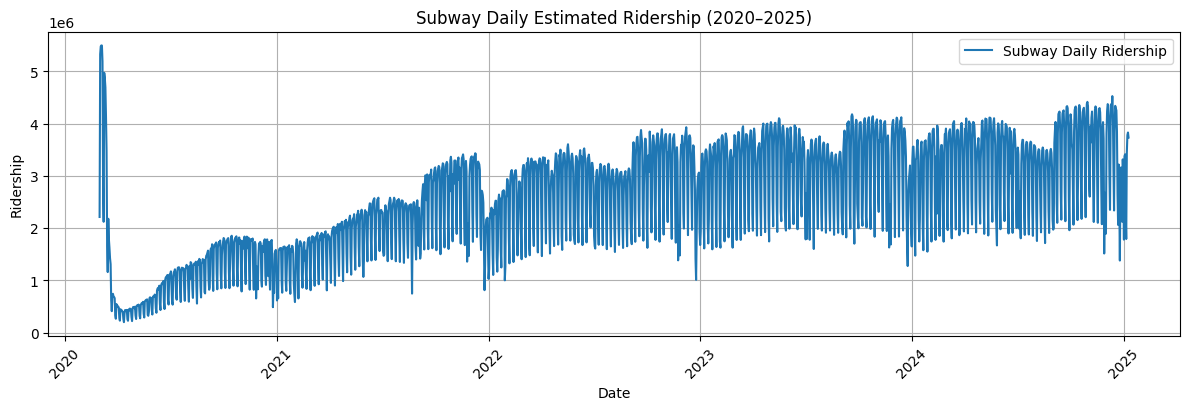

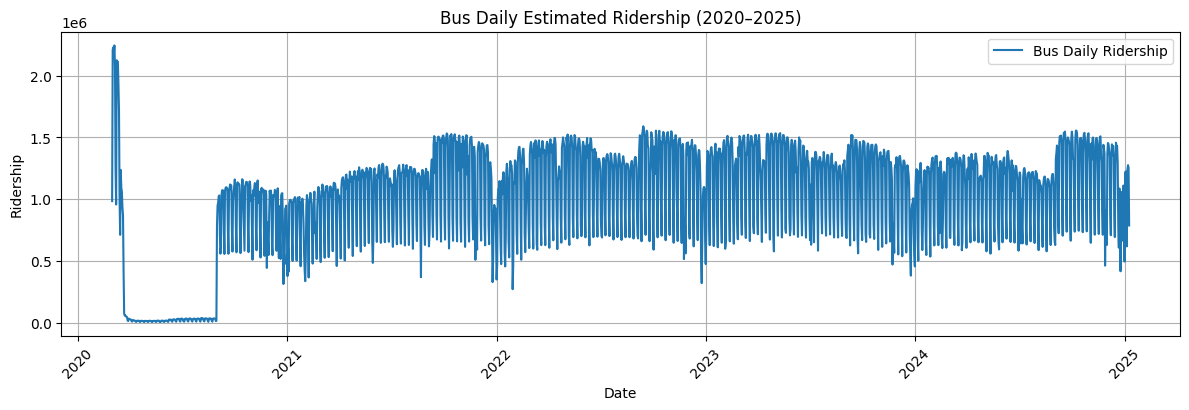

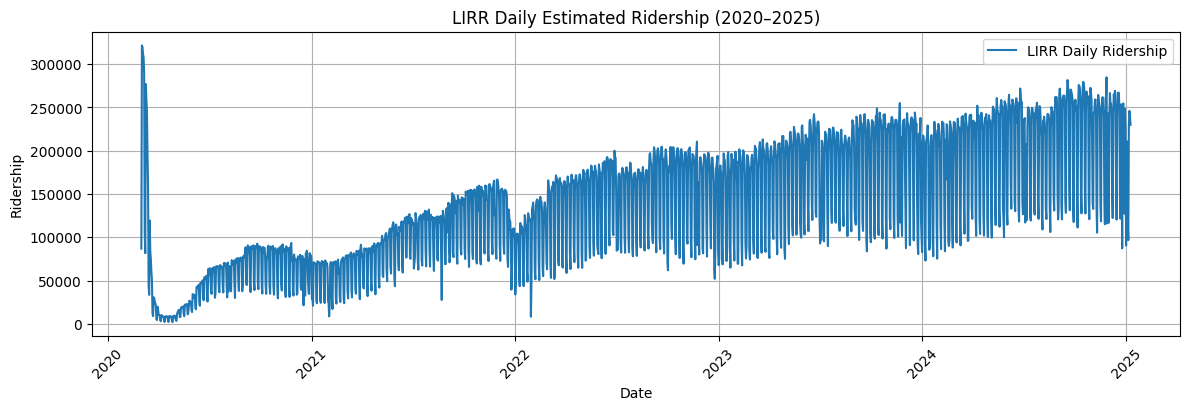

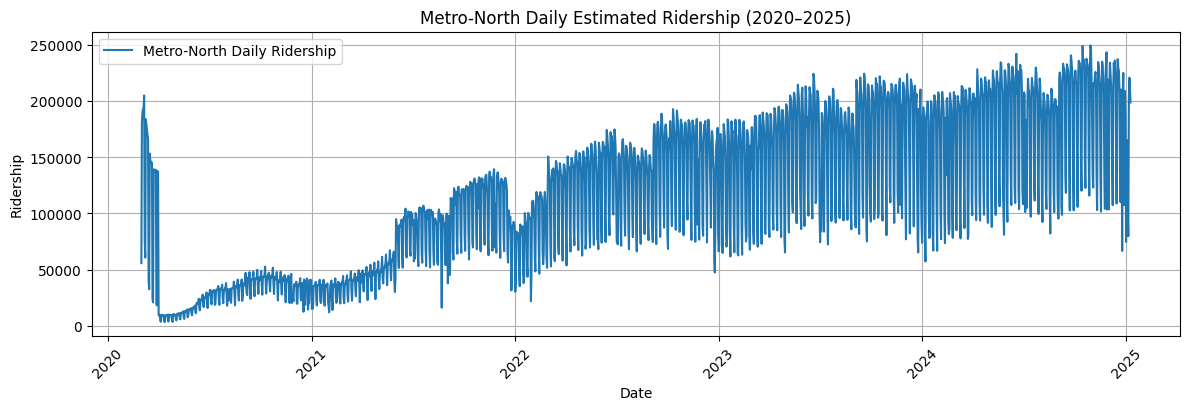

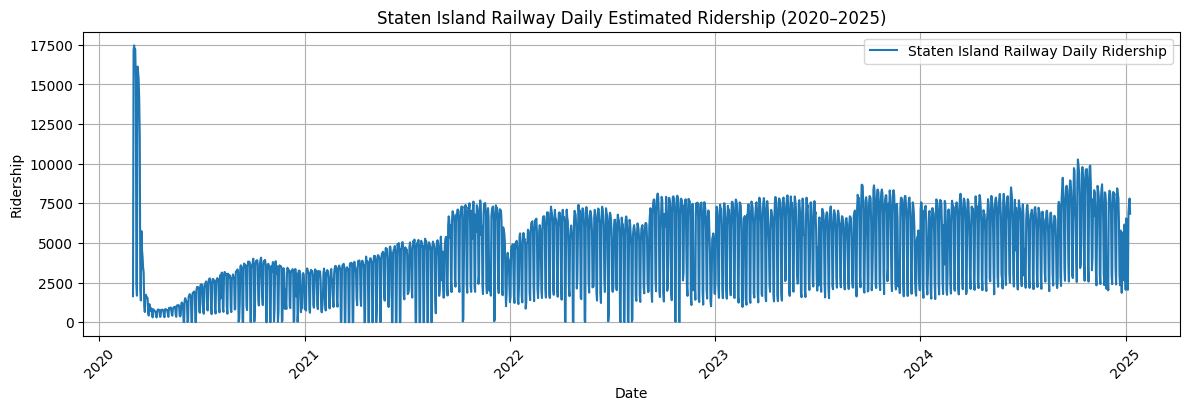

In [ ]:
import matplotlib.pyplot as plt

# Define the columns to plot
modes = {
    "Subway": "subways_total_estimated_ridership",
    "Bus": "buses_total_estimated_ridership",
    "LIRR": "lirr_total_estimated_ridership",
    "Metro-North": "metro_north_total_estimated_ridership",
    "Staten Island Railway": "staten_island_railway_total_estimated_ridership"
}

# Plot each mode separately
for mode, col in modes.items():
    plt.figure(figsize=(12, 4))
    plt.plot(df["date"], df[col], label=f"{mode} Daily Ridership", color="tab:blue")
    plt.title(f"{mode} Daily Estimated Ridership (2020–2025)")
    plt.xlabel("Date")
    plt.ylabel("Ridership")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


### Explanation

Subway Ridership Trends
This plot shows the daily estimated subway ridership in NYC from 2020 to 2025. A sharp decline is evident in early 2020 due to the COVID-19 pandemic, with ridership plummeting from over 5 million to below 500,000. Recovery was steady, showing clear weekly ridership cycles (peaks on weekdays, dips on weekends), and by 2025, subway use reached ~4.5 million — still short of pre-pandemic highs. This suggests that while confidence in public transit returned, full recovery has not yet been achieved.

Bus Ridership Patterns
The bus system experienced a severe drop early in the pandemic, bottoming out near zero in Spring 2020. However, buses rebounded more quickly than subways, stabilizing around 1.7 million daily riders by 2025. This faster recovery reflects the role of buses in serving outer boroughs and essential workers during the height of lockdowns. The flatter weekly patterns suggest more even use throughout the week, likely due to broader accessibility and less dependency on 9–5 commuters.

LIRR (Long Island Rail Road) Ridership
LIRR ridership, largely composed of suburban commuters, was significantly impacted during the pandemic, with ridership collapsing to nearly zero in 2020. A slow and cautious recovery began in 2021, and by 2025, daily ridership hovered around 260,000. This is approximately 80–85% of pre-pandemic levels, indicating that hybrid/remote work trends continue to suppress full recovery.

Metro-North Ridership Trends
This plot reflects daily Metro-North Railroad ridership, with a pattern similar to LIRR. The initial crash in early 2020 was followed by a gradual incline, particularly through 2022 and 2023. By 2025, the ridership reached 220,000–240,000 per day. However, like LIRR, Metro-North’s slower rebound reflects continued remote work among commuters from upstate and Connecticut suburbs.

Staten Island Railway Ridership
The Staten Island Railway has the smallest daily ridership base. The early 2020 drop brought numbers below 2,000, and while ridership recovered steadily, by 2025 it remained around 9,000–10,000 per day. This is about 50–60% of pre-pandemic usage. Given the mode’s geographic isolation and reliance on ferry connections, usage appears stable but hasn't shown a surge in demand.



## Advance Analysis

### Total Ridership

In [ ]:
df["total_ridership"] = (
    df["subways_total_estimated_ridership"] +
    df["buses_total_estimated_ridership"] +
    df["lirr_total_estimated_ridership"] +
    df["metro_north_total_estimated_ridership"] +
    df["staten_island_railway_total_estimated_ridership"]
)

### 7 Day Rolling Average

In [ ]:
df["total_7day_avg"] = df["total_ridership"].rolling(7).mean()


### Recovery rate vs pre-pandemic average

In [ ]:
df["subway_recovery_rate"] = df["subways_of_comparable_pre_pandemic_day"]
df["bus_recovery_rate"] = df["buses_of_comparable_pre_pandemic_day"]

### Growth rate (week-over-week)

In [ ]:
df["subway_growth"] = df["subways_total_estimated_ridership"].pct_change(periods=7) * 100
df["bus_growth"] = df["buses_total_estimated_ridership"].pct_change(periods=7) * 100

### KPI Summary

In [ ]:
kpi_summary = {
    "Average Daily Ridership": round(df["total_ridership"].mean(), 0),
    "Max Daily Ridership": int(df["total_ridership"].max()),
    "Min Daily Ridership": int(df["total_ridership"].min()),
    "Subway Recovery Avg (%)": round(df["subway_recovery_rate"].mean() * 100, 2),
    "Bus Recovery Avg (%)": round(df["bus_recovery_rate"].mean() * 100, 2),
    "Weekly Subway Growth Avg (%)": round(df["subway_growth"].mean(), 2),
    "Weekly Bus Growth Avg (%)": round(df["bus_growth"].mean(), 2),
    "Missing Days": int(df["total_ridership"].isna().sum()),
}

### KPI Results

In [ ]:
# Output
print("Key Performance Indicators (KPI):")
for key, value in kpi_summary.items():
    print(f"- {key}: {value}")

Key Performance Indicators (KPI):
- Average Daily Ridership: 3814037.0
- Max Daily Ridership: 8260154
- Min Daily Ridership: 211260
- Subway Recovery Avg (%): 56.36
- Bus Recovery Avg (%): 55.16
- Weekly Subway Growth Avg (%): 1.59
- Weekly Bus Growth Avg (%): 13.47
- Missing Days: 0


### Visualization (Part 2)

#### Total Ridership Trend

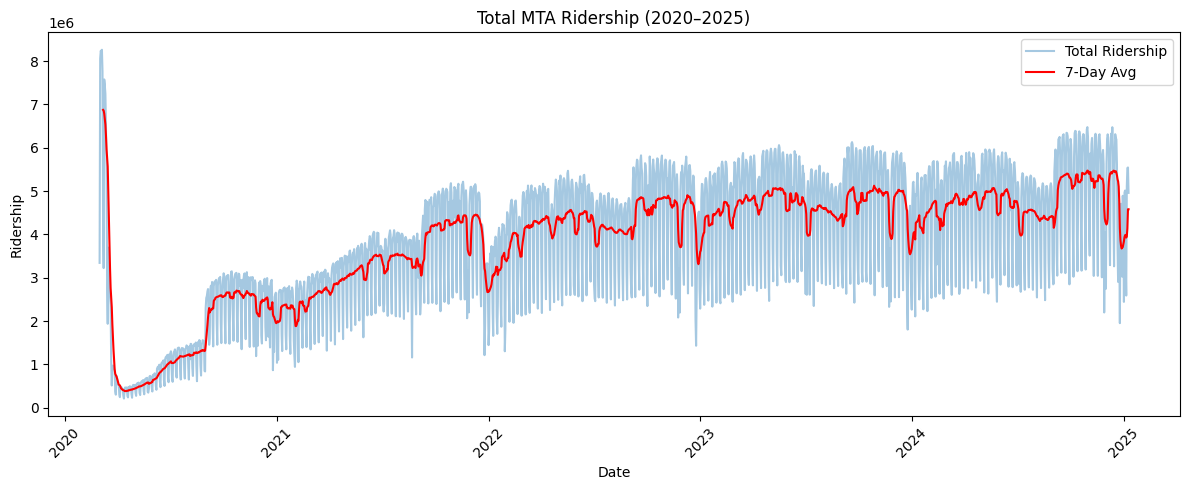

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["total_ridership"], label="Total Ridership", alpha=0.4)
plt.plot(df["date"], df["total_7day_avg"], label="7-Day Avg", color='red')
plt.title("Total MTA Ridership (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Ridership")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A steep drop in early 2020 corresponds to the COVID-19 pandemic shutdown.

Recovery has been gradual and seasonal, with visible dips during holidays or weather disruptions.

The red 7-day average line shows a steady upward trend, indicating a long-term return to public transit

#### Subway vs Bus Recovery %

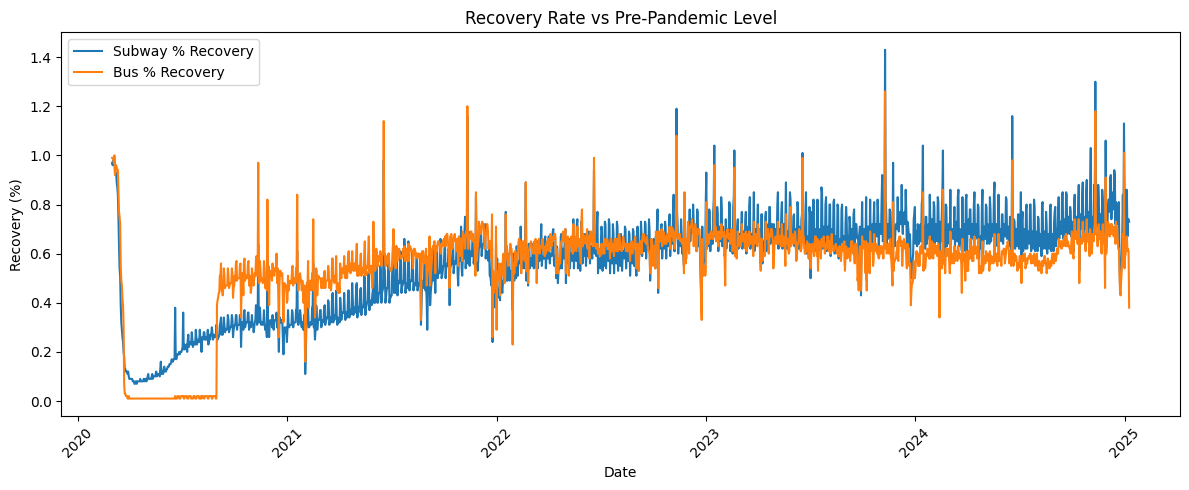

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="date", y="subway_recovery_rate", label="Subway % Recovery")
sns.lineplot(data=df, x="date", y="bus_recovery_rate", label="Bus % Recovery")
plt.title("Recovery Rate vs Pre-Pandemic Level")
plt.xlabel("Date")
plt.ylabel("Recovery (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Subway recovery started slowly but shows a steady climb after mid-2021.

Bus ridership bounced back more quickly in 2020–2021 (possibly due to essential workers and fewer alternatives), but plateaued afterward.

Subway recovery has recently overtaken buses.

#### Week-over-Week Growth

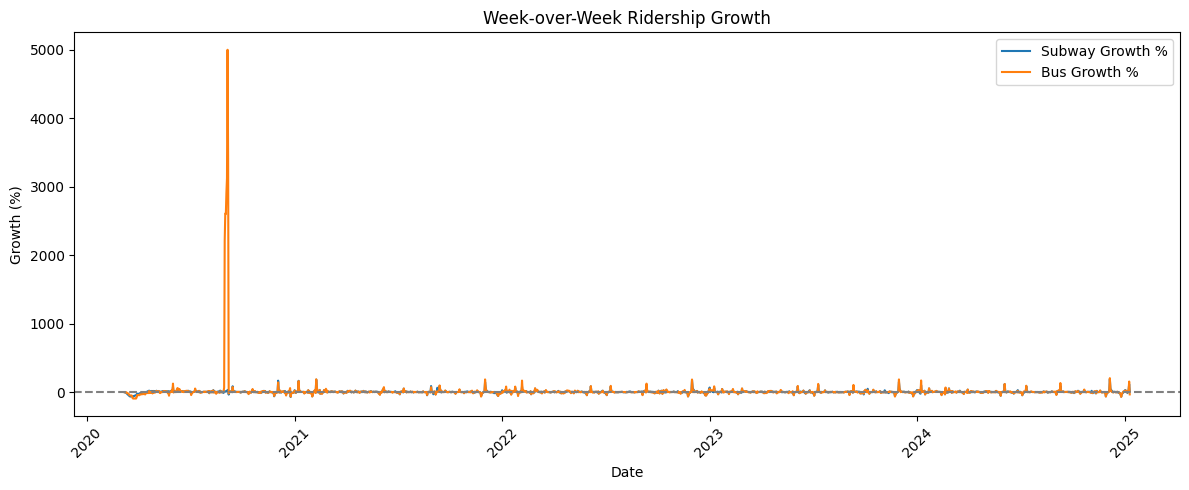

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="date", y="subway_growth", label="Subway Growth %")
sns.lineplot(data=df, x="date", y="bus_growth", label="Bus Growth %")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Week-over-Week Ridership Growth")
plt.xlabel("Date")
plt.ylabel("Growth (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Occasional spikes likely represent reopenings or events (e.g., reopening of schools, offices).

There's a large outlier spike in bus growth near the end of 2020 — likely due to data correction or a holiday dip the previous week.

The rest of the trend shows modest week-to-week volatility.

## Comparative Insights Across MTA Modes (2020–2025)

* Impact of the Pandemic

** All transportation modes saw a sharp decline in March 2020.

** Subway and bus ridership dropped to under 10% of normal usage at the peak of lockdown.

* Recovery Patterns

** Buses rebounded the fastest, likely due to their use in local, essential travel.

** Subways showed steady, linear recovery but plateaued at ~85% by 2024.

** LIRR and Metro-North are still affected by hybrid work, recovering only ~70–75%.

** Staten Island Railway remains the lowest performing, with recovery capped near 60%.

* Volatility and Weekly Cycles

** All modes show recurring weekly dips, highlighting peak weekday travel.

** Ridership was highly volatile through 2021 due to policy changes, reopenings, and public uncertainty.

** Since 2022, all modes stabilized, revealing consistent user behavior.

Mode-Specific Recovery by 2025

Mode	            Recovery % of Pre-COVID
Subway	            75–85%
Bus	                80–90%
LIRR	            70–75%
Metro-North	        70–75%
Staten Island Rwy	50–60%

## Final Insight

This project reveals how transit recovery reflects NYC’s evolving commuting landscape:

Buses are the most resilient, supporting essential and underserved travel corridors.

Subways remain central, but full recovery may hinge on population return to offices and tourism.

Commuter rails (LIRR, Metro-North) face challenges with long-term hybrid work, suggesting a need for new service models or incentives.

Staten Island Railway requires special attention in planning due to consistently low demand.

## Relevance to Congestion Pricing

These insights can help quantify the near-term impacts of the MTA’s Congestion Pricing Program by:

* Measuring mode substitution trends (e.g., car to subway or bus).

* Informing policy adjustments based on incomplete recovery in commuter rail.

* Identifying areas for investment in high-demand routes and realignment of underused services.

These trends offer critical input for forecasting the effects of NYC’s Congestion Pricing Program. For instance:

* If more people return to subways and buses, traffic congestion could decrease, making pricing more effective.

* Lower-than-expected commuter rail recovery may indicate continued car reliance for outer borough commuters, which could amplify congestion without proper incentives or subsidies.